In [1]:
import exoplanet_mcmc.exoplanet_mcmc as exmc
import matplotlib
%matplotlib inline

# Exoplanet_MCMC Demonstration

The goal of this notebook is to demonstrate the effect of different properties of astrometric data on the posterior distributions resulting from the MCMC package I have written. I will show the effect of having more or less densely sampled data, greater or fewer points included, and smaller or larger uncertainties on the observations.

## Using the module exoplanet_mcmc

To get to a corner plot of the orbital parameters of a system, only four functions must be used:

### Create an instance of System

In [2]:
print(exmc.System.__init__.__doc__)

 Instantiates a System
            Arguments [all without units attached]:
                mstar - stellar mass in units of Msun
                mplanet - planetary mass in units of Mjup
                distance - distance to system in parsecs
                semimajor_axis - in au
                eccentricity
                time_of_periastron [between -1 and 1, units of period]
                argument_of_periastron [-2pi to 2pi]
                timesteps - number of timesteps in an orbit


In [3]:
sys=exmc.System(mstar=1, mplanet=1, distance=5, semimajor_axis=5, eccentricity=.33, time_periastron=0, argument_of_periastron=0, timesteps=25)

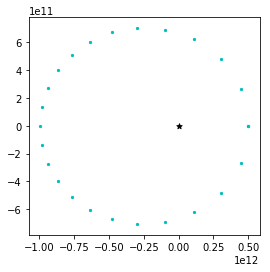

In [4]:
_=sys.plot_orbit()

### Pick a sample of the orbit to add noise to and use as observations for the MCMC

In [5]:
print(exmc.System.generate_mcmc_sample.__doc__)

 For an instance of system, generates a sample to run MCMC on.
            Arguments:
                mas_unc - uncertainty in observations in mas, no units attached
                sigma_true_anomaly - uncertainty in observations of position angle in degrees
                sigma_mass - uncertainty in the stellar mass as a fraction of true stellar mass
                indices - slice of the time, true_anomaly, and radius arrays to use
        


In [6]:
sys.generate_mcmc_sample(mas_unc=5, sigma_true_anomaly=2, sigma_mass=.05, indices=[int(len(sys.times)/3), int(2*len(sys.times)/3)])

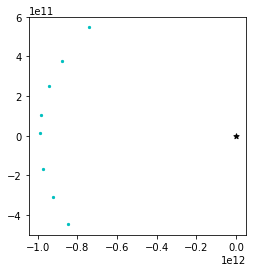

In [7]:
_=sys.plot_mcmc_sample()

### Generate the first guess of the parameters for the sample observations

In [8]:
print(exmc.System.generate_first_guess.__doc__)

 Method to generate the first guess [initial position in parameter space] for the MCMC, by minimizing the
        likelihood function. 


In [9]:
sys.generate_first_guess()

### Run the MCMC on the sample of the data

In [11]:
print(exmc.System.runmcmc.__doc__)

 Method to run emcee on an instance of System for which generate_sample_data has been run.
            Arguments:
                p0spread - fraction of range of parameter space which is used as variance of normal distribution to sample from
                nwalker - number of MCMC walkers
                nburn - number of burn-in steps
                nsteps - number of MCMC steps
            Note: For the EnsembleSampler default affine invariant algorithm, it is good to use many walkers and fewer steps.


In [12]:
sys.runmcmc(p0spread=.01, nwalker=100, nburn=100, nsteps=100)

1.97863504364e+30 2.15386507709e+30
0.293467859395 0.345763269825
710162996439.0 776909434473.0
-0.0977553420963 0.00893091829918
-0.483285791497 0.136005423183
Burn in progress:  0.0%
Burn in progress: 10.0%
Burn in progress: 20.0%
Burn in progress: 30.0%
Burn in progress: 40.0%
Burn in progress: 50.0%
Burn in progress: 60.0%
Burn in progress: 70.0%
Burn in progress: 80.0%
Burn in progress: 90.0%
MCMC progress:  0.0%
MCMC progress: 10.0%
MCMC progress: 20.0%
MCMC progress: 30.0%
MCMC progress: 40.0%
MCMC progress: 50.0%
MCMC progress: 60.0%
MCMC progress: 70.0%
MCMC progress: 80.0%
MCMC progress: 90.0%
The mean acceptance fraction was 0.200. This value suggests the MCMC was not tuned well.


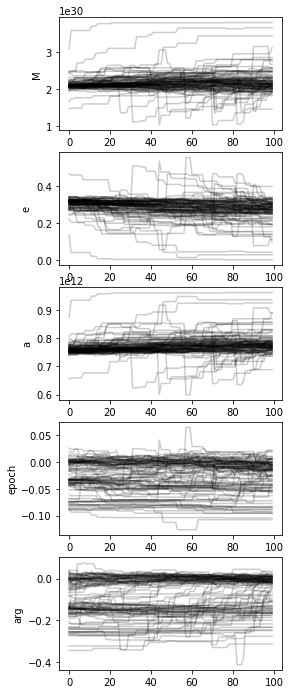

In [13]:
_=sys.walker_plot()

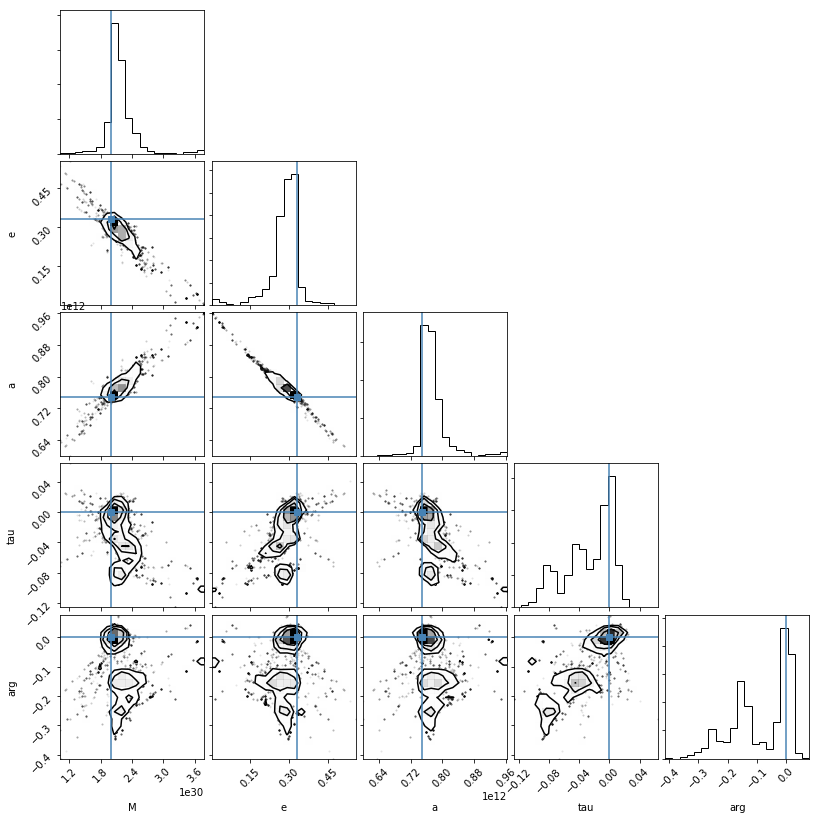

In [14]:
_=sys.corner_plot()